## 1. Data reading & first glance

In [17]:
import pandas as pd


path = "..\\Downloads\\1_housing_iteration_0_2_classification\\housing_iteration_0_2_classification\\housing_iteration_0_2_classification.csv"


data = pd.read_csv(path)

data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [19]:
data.columns   # get all the names of columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

The target column (what we want our model to predict) is usually denoted as `y` and we call it a `label`. We will "pop" it out from the rest of the data:

In [21]:
y = data.pop("Expensive")

In [23]:
type(y)

pandas.core.series.Series

As you can see, the target is just a bunch of zeros and ones. 1 means the house has a fireplace and 0 means the house has no fireplace:

In [25]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

The "feature vector" (the columns used to predict the target) is denoted as `X`.

Some of the columns in the original dataset are unique identifiers of each passenger. Unique identifiers are not useful when it comes to finding patterns in the data. So, the first step when building our `X`, the vector of predictor features, is to drop them:

In [27]:
#X = data.drop(columns=[""])
X = data
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


Even if the target (`y`) and the features (`X`) are in two different objects, there is still a very easy mapping between them: the first row in `X` and the first element in `y` both correspond to the first house, the second row in `X`and the second element in `y` correspond to the second passenger, and so on.

## 2. Basic Exploration

Just look briefly at the data types of your columns get get an idea of how they look like.

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [31]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

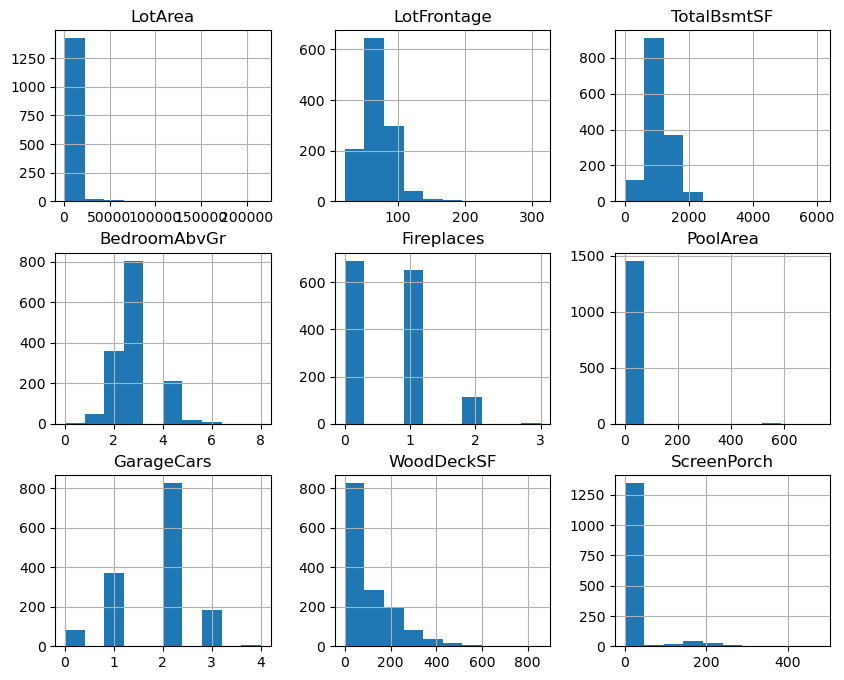

In [33]:
X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [37]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0


In [39]:
y_train.head()

772    0
157    1
360    0
744    0
150    0
Name: Expensive, dtype: int64

As you can see from the indices, both the `X` and `y` train sets contain first the house in position `1253`, then the one in position `202`, etc.

The same applies for the test set:

In [41]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,17542,NaN,1192,3,2,0,2,220,0
202,7000,50.0,617,2,0,0,1,0,0
213,13568,43.0,990,3,0,0,2,224,0
1331,10780,55.0,911,3,0,0,2,0,0
120,21453,NaN,938,1,2,0,2,0,0


In [43]:
y_test.head()

1253    1
202     0
213     0
1331    0
120     0
Name: Expensive, dtype: int64

## 4. Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has built following simple rules, common sense or gained expertise.

Therefore, the first step when solving any problem should be to create a simple (even dumb) working solution and learn to evaluate it. In our example: how well can we predict fireplaces with an extremely simple rule?

Let's start by suggesting that no house has a fireplace. We will call this "model" the "pessimistic" one, and use it to make predictions for both the train and the test set:

In [45]:
y_train.value_counts()

Expensive
0    989
1    179
Name: count, dtype: int64

In [47]:
len(y_train)

1168

Our predictions for the train set will be just 1168 zeros:

In [51]:
pred_pessimistic_train = pd.Series(0, index=range(1168))

In [53]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)


# predicted real // correct
# 0         0        1
# 0         1        0
# 1         1        1
# accuracy = (1 + 0 + 1) / 3 = 2 / 3

0.85

Okay, we have about a 85% accuracy in our train set. Let's find out how it would have done in our test set:

In [55]:
len(y_test)

292

In [57]:
pred_pessimistic_test = pd.Series(0, index=range(292))

In [59]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.87

The performance is pretty much the same. This is typical from simple models: they have a low performance, but the performance stays the same in the data where they were trained and in new data.

A model with a consistent performance between the training and testing set is said to have a **low variance**, which is good. However, a model with a low variance is said to have a **high bias**, which is not so good.

Our model, with high bias, is missing important connections between the features and the target. Another term to describe this is **underfitting**.


Ideally, we want a low variance and a low bias: a high accuracy consistent across the train and the test set.

https://www.bmc.com/blogs/bias-variance-machine-learning

In [ ]:
# your code here